In [361]:
import pandas as pd
import re
import copy
import numpy as np

In [235]:
news = pd.read_csv('news_callrate_merge.csv')
bok = pd.read_csv('bok_callrate_merge.csv')
report = pd.read_csv('merged_report.csv')

In [236]:
news.drop(news.columns[0], axis = 'columns', inplace = True)
bok.drop(bok.columns[0], axis = 'columns', inplace = True)
report.drop(report.columns[0], axis = 'columns', inplace = True)

In [237]:
# 뉴스 데이터 
news['ngram'] = news['ngram'].str.replace('[\[\]\' ]', '')

In [238]:
news

,date,title,content,ngram,labeling
0,2005-05-01,<은행전쟁 원년 `빅4' 1분기 승패는>,이른바 은행들의 전쟁 원년인 올해 시중은행의 초반 전적표가 나왔다. 금융계에 따르면...,"자산/NNG;건전성/NNG;개선/NNG,무수익여신/NNG;증가/NNG,순이자마진/N...",up
1,2005-05-01,3월 中企 연체율 2.6%..작년말보다 0.5%p상승,작년동기.전월 대비로는 낮아 중소기업 대출 연체율이 작년 동기에 비해서는 낮아졌지만...,"대출/NNG;연체율/NNG;오르/VV,대출/NNG;연체율/NNG;높/VA,대출심사/...",up
2,2005-05-01,"펀드 수익률, 초라한 주식형..빛나는 채권형",출발한 증시가 마감했다. 경기선 이라고 불리는 이동평균선까지 하회하면서 중기 상승추...,"글로벌/NNG;경기/NNG;둔화/NNG;우려/NNG;강세/NNG,경기/NNG;지표/...",up
3,2005-05-01,증시 갈림길..FOMC에 쏠린 눈,잔인했다. 어닝 시즌 기업들이 내놓은 실적은 실망감만 불렀고 세자리수대를 넘나든 원...,"기업/NNG;수익성/NNG;악화/NNG;우려/NNG,경제/NNG;지표/NNG;성장/...",up
4,2005-05-01,"뉴욕증시, FOMC·고용지표 촉각",뉴욕증시 투자자들이 시장의 방향을 정하지 못한채 하루하루 재료에 과민반응하고 있다....,"인플레이션/NNG;압력/NNG;억제/NNG,제조업/NNG;지수/NNG;둔화/NNG,...",up
...,...,...,...,...,...
224594,2017-12-29,"""금융 환경 어렵더라도 기존 금융 경계 깨고 날아오르자""",김용환 NH농협금융지주 회장은 기존 금융의 경계를 깨고 힘차게 날아오르는 파벽비거 ...,"부동산/NNG;규제/NNG;강화/NNG,불확실성/NNG;증대/NNG,건전성/NNG;...",up
224595,2017-12-29,[2017 부동산 결산]저금리에 경매물건 감소…가격은 역대 최고,지난 문재인 정부 출범 이후 부동산 대책을 시작으로 대책 가계부채 종합대책 주거복지...,"부동산/NNG;가격/NNG;오르/VV,집값/NNG;안정/NNG,저점/NNG;상승/N...",up
224596,2017-12-29,[2018 재테크 기상도]② “중·소형株에 주목하라”,재테크 전문가들은 기업 간 공정거래 감시 연기금 투자 등 중 소형주 株 강세를 전망...,"금리/NNG;인상/NNG;부담/NNG,신용스프레드/NNG;낮/VA,경기/NNG;상승...",up
224597,2017-12-29,[2018 재테크 기상도]④ “자산의 20%는 달러화에 투자하라”,“역시 달러”최근 원 달러 환율이 아래로 바닥을 두드리고 있는 가운데 재테크 전문가...,"자금/NNG;유입/NNG;가능성/NNG;높/VA,활성화/NNG;금리/NNG;인상/N...",up


In [245]:
# 의사록 데이터
bok['ngram'] = bok['ngram'].str.replace('@@@', ',')

In [246]:
bok

,date,Foreign Currency,Financial Markets,ngram,labeling
0,2005-06-09,일부 위원은 우리나라 경제가 일본경제에 비해 더 나아질 특별한 요인이 없음에도 불구...,"일부 위원은 M1이 실물경제와 어느 정도의 시차를 두고 밀접한 연관성을 지니는지, ...","경제/NNG,경제/NNG,비해/VV,더/MAG,낫/VV,특별/NNG,요인/NNG,없...",down
1,2005-07-07,일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷해지...,일부 위원은 단기적으로 대출이 급격히 증가한 후에는 반드시 조정이 이어지고 민간소비...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",down
2,2005-08-11,일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다면서...,일부 위원은 최근 장기시장금리 상승에도 불구하고 기업 자금조달은 오히려 확대되고 있...,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG...",up
3,2005-09-08,일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인도네...,일부 위원은 시장이 제대로 작동한다면 비우량등급의 회사채 가산금리가 사상 최저치를 ...,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기...",down
4,2005-10-11,일부 위원은 미국과 우리나라의 정책금리 격차가 확대되고 있는 가운데 금년 두 차례 ...,일부 위원은 8월말 이후 우리나라 주가지수가 큰 폭 상승한 것은 경제성장에 대한 낙...,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N...",up
...,...,...,...,...,...
142,2017-05-25,일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도 외...,NaN,"국제/NNG,금융시장/NNG,안정/NNG,되/VV,지속/NNG,하/XSV,가운데/N...",down
143,2017-07-13,일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.@@@에도...,NaN,"성장/NNG,고용/NNG,회복국면/NNG,정점/NNG,향하/VV,불구/NNG,물가/...",up
144,2017-08-31,일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속하면...,NaN,"금리정상화/NNG,행보/NNG,불구/NNG,미/NNG,달러/NNG,약세/NNG,기조...",up
145,2017-10-19,일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대감이 커지면서...,NaN,"임금/NNG,상승/NNG,확대/NNG,되/XSV,세제/NNG,개혁/NNG,기대/NN...",0


In [248]:
# 채권 데이터
report

,date,title,content,ngrams,labeling
0,2008-04-01,대우증권 월간 채권투자 (4월),ㅎㅎㅎ2008_04 월간채권투자채 권 시 장 전 망금 융 시 장 차 트 북對應과 ...,"['미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG', '경기/NN...",up
1,2008-04-07,돌아온 박스권,Microsoft Word - 0407.docFixed Income Weekly 2...,"['글로벌/NNG;신용경색/NNG;완화/NNG', '단기/NNG;인플레이션/NNG;...",up
2,2008-04-07,시간차 공격,Microsoft Word - 0407.docFixed Income Weekly 2...,"['글로벌/NNG;신용경색/NNG;완화/NNG', '단기/NNG;인플레이션/NNG;...",up
3,2008-04-14,총재의 변신은 무죄다?!,Microsoft Word - Fixedincome0414.doc 4월 금통위...,"['예상/NNG;경제/NNG;성장률/NNG;하향/NNG', '금리/NNG;인하/NN...",up
4,2008-04-21,항상 열려는 있는 가능성,Microsoft Word - 920_0421_Fixed Income Weekly....,"['미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG', '금리/NN...",down
...,...,...,...,...,...
3750,2020-07-16,기존 정책 유지,(Microsoft Word - 200715_\300\374\267\253\277\...,"['경제/NNG;성장률/NNG;전망/NNG;하향/NNG', '금리/NNG;인하/NN...",NaN
3751,2020-07-17,꽤 오랫동안 유지될 완화정책,(Microsoft Word - 200716_\300\374\267\253\277\...,"['물가/NNG;상승률/NNG;국제/NNG;유가/NNG;하락/NNG', '수요측면/...",NaN
3752,2020-07-17,높아진 경기 불확실성,2013년 0월 0일 7월 금통위: 높아진 경기 불확실성 Inves...,"['물가/NNG;상승률/NNG;국제/NNG;유가/NNG;하락/NNG', '국제/NN...",NaN
3753,2020-07-20,한은의 성장률 전망 하향에 따른 향후 금리 방향은,Compliance Notice 당사는 동 자료를 기관투자자 또는 제...,"['금리/NNG;인하/NNG;가능성/NNG;차단/NNG', '부진/NNG;성장률/N...",NaN


In [249]:
# 2017-12-31후 데이터 제거
idx = []

for i in range(len(report)):
    if str(report['labeling'][i]) == 'nan':
        idx.append(i)
        
len(idx)

660

In [250]:
report.drop(idx, inplace = True)

In [251]:
report.rename(columns = {'ngrams':'ngram'}, inplace = True)

In [647]:
report.head(30)

,date,title,content,ngram,labeling
0,2008-04-01,대우증권 월간 채권투자 (4월),ㅎㅎㅎ2008_04 월간채권투자채 권 시 장 전 망금 융 시 장 차 트 북對應과 ...,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,경기/NNG;개선/...",up
1,2008-04-07,돌아온 박스권,Microsoft Word - 0407.docFixed Income Weekly 2...,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",up
2,2008-04-07,시간차 공격,Microsoft Word - 0407.docFixed Income Weekly 2...,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",up
3,2008-04-14,총재의 변신은 무죄다?!,Microsoft Word - Fixedincome0414.doc 4월 금통위...,"예상/NNG;경제/NNG;성장률/NNG;하향/NNG,금리/NNG;인하/NNG;기대/...",up
4,2008-04-21,항상 열려는 있는 가능성,Microsoft Word - 920_0421_Fixed Income Weekly....,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,금리/NNG;인하/...",down
5,2008-04-28,FOMC 이후 원자재 가격 상승세 둔화 여부에 관심,Microsoft Word - FixedIncome_0428.doc FOMC ...,"fed/NNG;원자재/NNG;가격/NNG;상승/NNG,원자재/NNG;가격/NNG;상...",down
6,2008-05-04,정부의 금리인하 요구에 한은의 부응 제스쳐 나타나며..,ㅎㅎㅎ2008_05 월간채권투자채 권 시 장 전 망금 융 시 장 차 트 북機會의 ...,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,국제/NNG;유가/...",down
7,2008-05-13,레인지의 상단부에서 기회를 다시 만들어가는 입장,Microsoft Word - FixedIncome_0513_.doc 레인지의...,"인하/NNG;기대/NNG;금리/NNG;하락/NNG,국제/NNG;상품/NNG;가격/N...",down
8,2008-05-19,대우증권 5월 19일 채권 시황,Microsoft Word - new Bond Brie_080519.doc 1 Da...,"물가/NNG;상승/NNG;압력/NNG;금리/NNG;상승/NNG,호조/NNG;기대/N...",down
9,2008-05-20,대우증권 5월 20일 채권 시황,Microsoft Word - 0520_Daewoo Bond Brief.doc 1 ...,"금리/NNG;상승/NNG;환율/NNG;상승/NNG,채권/NNG;매수/NNG;심리/N...",down


In [253]:
report['ngram'] = report['ngram'].str.replace('[\[\]\' ]', '')

In [254]:
report

,date,title,content,ngram,labeling
0,2008-04-01,대우증권 월간 채권투자 (4월),ㅎㅎㅎ2008_04 월간채권투자채 권 시 장 전 망금 융 시 장 차 트 북對應과 ...,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,경기/NNG;개선/...",up
1,2008-04-07,돌아온 박스권,Microsoft Word - 0407.docFixed Income Weekly 2...,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",up
2,2008-04-07,시간차 공격,Microsoft Word - 0407.docFixed Income Weekly 2...,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",up
3,2008-04-14,총재의 변신은 무죄다?!,Microsoft Word - Fixedincome0414.doc 4월 금통위...,"예상/NNG;경제/NNG;성장률/NNG;하향/NNG,금리/NNG;인하/NNG;기대/...",up
4,2008-04-21,항상 열려는 있는 가능성,Microsoft Word - 920_0421_Fixed Income Weekly....,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,금리/NNG;인하/...",down
...,...,...,...,...,...
3090,2017-12-18,속도 조절 중,(Microsoft Word - \307\366\264\353\302\367_Cre...,"크레딧/NNG;시장/NNG;스프레드/NNG;축소/NNG,전망/NNG;상향/NNG;전...",up
3091,2017-12-20,확신 없는 인상의견도 있었음이 확인,Fixed Income 2017. 12. 20 11월 금통위 의...,"금리/NNG;인상/NNG;반대/NNG,희박/NNG;금리/NNG;인상/NNG,아직/M...",up
3092,2017-12-20,2금융권 안심전환대출 수급영향 점검,2013년 0월 0일 2금융권 안심전환대출 수급영향 점검 Inve...,"국고채/NNG;금리/NNG;급등/NNG,원금/NNG;상환/NNG;부담/NNG,금리/...",up
3093,2017-12-26,11월 채권시장 전망,PowerPoint 프레젠테이션Fixed Income Analyst 김지만 02-3...,"기대/NNG;글로벌/NNG;금리/NNG;상승/NNG,하락/NNG;예상/NNG;금리/...",up


In [255]:
# 사전 만들기 위한 데이터 
news_ngram = pd.DataFrame(news, columns = ['date', 'ngram', 'labeling'])
bok_ngram = pd.DataFrame(bok, columns = ['date', 'ngram', 'labeling'])
report_ngram = pd.DataFrame(report, columns = ['date', 'ngram', 'labeling'])

In [256]:
ngram = pd.concat([news_ngram, bok_ngram, report_ngram])

In [257]:
ngram

,date,ngram,labeling
0,2005-05-01,"자산/NNG;건전성/NNG;개선/NNG,무수익여신/NNG;증가/NNG,순이자마진/N...",up
1,2005-05-01,"대출/NNG;연체율/NNG;오르/VV,대출/NNG;연체율/NNG;높/VA,대출심사/...",up
2,2005-05-01,"글로벌/NNG;경기/NNG;둔화/NNG;우려/NNG;강세/NNG,경기/NNG;지표/...",up
3,2005-05-01,"기업/NNG;수익성/NNG;악화/NNG;우려/NNG,경제/NNG;지표/NNG;성장/...",up
4,2005-05-01,"인플레이션/NNG;압력/NNG;억제/NNG,제조업/NNG;지수/NNG;둔화/NNG,...",up
...,...,...,...
3090,2017-12-18,"크레딧/NNG;시장/NNG;스프레드/NNG;축소/NNG,전망/NNG;상향/NNG;전...",up
3091,2017-12-20,"금리/NNG;인상/NNG;반대/NNG,희박/NNG;금리/NNG;인상/NNG,아직/M...",up
3092,2017-12-20,"국고채/NNG;금리/NNG;급등/NNG,원금/NNG;상환/NNG;부담/NNG,금리/...",up
3093,2017-12-26,"기대/NNG;글로벌/NNG;금리/NNG;상승/NNG,하락/NNG;예상/NNG;금리/...",up


In [258]:
ngram = ngram.reset_index(drop = True)

In [259]:
ngram

,date,ngram,labeling
0,2005-05-01,"자산/NNG;건전성/NNG;개선/NNG,무수익여신/NNG;증가/NNG,순이자마진/N...",up
1,2005-05-01,"대출/NNG;연체율/NNG;오르/VV,대출/NNG;연체율/NNG;높/VA,대출심사/...",up
2,2005-05-01,"글로벌/NNG;경기/NNG;둔화/NNG;우려/NNG;강세/NNG,경기/NNG;지표/...",up
3,2005-05-01,"기업/NNG;수익성/NNG;악화/NNG;우려/NNG,경제/NNG;지표/NNG;성장/...",up
4,2005-05-01,"인플레이션/NNG;압력/NNG;억제/NNG,제조업/NNG;지수/NNG;둔화/NNG,...",up
...,...,...,...
227836,2017-12-18,"크레딧/NNG;시장/NNG;스프레드/NNG;축소/NNG,전망/NNG;상향/NNG;전...",up
227837,2017-12-20,"금리/NNG;인상/NNG;반대/NNG,희박/NNG;금리/NNG;인상/NNG,아직/M...",up
227838,2017-12-20,"국고채/NNG;금리/NNG;급등/NNG,원금/NNG;상환/NNG;부담/NNG,금리/...",up
227839,2017-12-26,"기대/NNG;글로벌/NNG;금리/NNG;상승/NNG,하락/NNG;예상/NNG;금리/...",up


In [268]:
# NBC
test = ngram.copy()

In [269]:
test

,date,ngram,labeling
0,2005-05-01,"자산/NNG;건전성/NNG;개선/NNG,무수익여신/NNG;증가/NNG,순이자마진/N...",up
1,2005-05-01,"대출/NNG;연체율/NNG;오르/VV,대출/NNG;연체율/NNG;높/VA,대출심사/...",up
2,2005-05-01,"글로벌/NNG;경기/NNG;둔화/NNG;우려/NNG;강세/NNG,경기/NNG;지표/...",up
3,2005-05-01,"기업/NNG;수익성/NNG;악화/NNG;우려/NNG,경제/NNG;지표/NNG;성장/...",up
4,2005-05-01,"인플레이션/NNG;압력/NNG;억제/NNG,제조업/NNG;지수/NNG;둔화/NNG,...",up
...,...,...,...
227836,2017-12-18,"크레딧/NNG;시장/NNG;스프레드/NNG;축소/NNG,전망/NNG;상향/NNG;전...",up
227837,2017-12-20,"금리/NNG;인상/NNG;반대/NNG,희박/NNG;금리/NNG;인상/NNG,아직/M...",up
227838,2017-12-20,"국고채/NNG;금리/NNG;급등/NNG,원금/NNG;상환/NNG;부담/NNG,금리/...",up
227839,2017-12-26,"기대/NNG;글로벌/NNG;금리/NNG;상승/NNG,하락/NNG;예상/NNG;금리/...",up


In [270]:
def split(doc):
    return doc.split(',')

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer(tokenizer = split)),
                      ('clf', MultinomialNB()), ])

text_clf = text_clf.fit(test['ngram'], test['labeling'])

In [320]:
text_clf['vect'].get_feature_names()

['',
 'aa등급/nng',
 'a등급/nng',
 'bbb등급/nng',
 'bei/nng;급락/nng',
 'bei/nng;낮/va',
 'bei/nng;높/va',
 'bei/nng;상승/nng',
 'bei/nng;상회/nng',
 'bei/nng;오르/vv',
 'bei/nng;저점/nng',
 'bei/nng;최저/nng',
 'bei/nng;축소/nng',
 'bei/nng;하락/nng',
 'bei/nng;확대/nng',
 'bis/nng',
 'bis/nng;경고/nng',
 'bis/nng;낮/va',
 'bis/nng;떨어/vv',
 'bis/nng;비율/nng;개선/nng',
 'bis/nng;비율/nng;낮/va',
 'bis/nng;비율/nng;높/va',
 'bis/nng;비율/nng;높/vv',
 'bis/nng;비율/nng;떨어/vv',
 'bis/nng;비율/nng;상승/nng',
 'bis/nng;비율/nng;양호/nng',
 'bis/nng;비율/nng;오르/vv',
 'bis/nng;비율/nng;하락/nng',
 'bis/nng;위험가중치/nng;상향/nng',
 'bis/nng;자기자본비율/nng;개선/nng',
 'bis/nng;자기자본비율/nng;낮/va',
 'bis/nng;자기자본비율/nng;높/va',
 'bis/nng;자기자본비율/nng;높/vv',
 'bis/nng;자기자본비율/nng;떨어/vv',
 'bis/nng;자기자본비율/nng;상승/nng',
 'bis/nng;자기자본비율/nng;오르/vv',
 'bis/nng;자기자본비율/nng;하락/nng',
 'bis/nng;하락/nng',
 'cd/nng',
 'cd/nng;cp/nng;금리/nng;상승/nng',
 'cd/nng;cp/nng;금리/nng;하락/nng',
 'cd/nng;cp/nng;낮/va',
 'cd/nng;cp/nng;오르/vv',
 'cd/nng;cp/nng;하락/nng',
 'cd/nng;감소/nng',
 'cd/nng;금리/nng

In [281]:
text_clf['clf'].classes_

array(['0', 'down', 'up'], dtype='<U4')

In [278]:
text_clf['clf'].class_count_

array([38318., 93808., 95715.])

In [279]:
text_clf['clf'].feature_count_

array([[1., 0., 1., ..., 0., 3., 0.],
       [3., 1., 0., ..., 2., 5., 1.],
       [5., 0., 1., ..., 0., 9., 0.]])

In [677]:
# ngram polarity score 계산
pol_score = []
haw = text_clf['clf'].feature_count_[2] / text_clf['clf'].class_count_[2]
dov = text_clf['clf'].feature_count_[1] / text_clf['clf'].class_count_[1]


for i in range(len(haw)):
    if i in (14336, 17658) :
        print(text_clf['clf'].feature_count_[2][i])
        print(text_clf['clf'].feature_count_[1][i])
        print(haw[i])
        print(dov[i])
    
    if haw[i] == 0 or dov[i] == 0:
        pol_score.append((0,0,0))
    else:
        if haw[i] >= dov[i]:
            if haw[i] / dov[i] >= 1.3:
                pol_score.append(('H', haw[i] / dov[i], text_clf['clf'].feature_count_[2][i]))
            else:
                pol_score.append((0,0,0))
        else:
            if dov[i] / haw[i] >= 1.3:
                pol_score.append(('D', haw[i] / dov[i], text_clf['clf'].feature_count_[1][i]))
            else:
                pol_score.append((0,0,0))

3472.0
3185.0
0.036274356161521186
0.03395232815964523
2181.0
2332.0
0.02278639711643943
0.024859287054409006


In [678]:
text_clf['vect'].get_feature_names().index('금리/nng;인상/nng')

15470

In [679]:
text_clf['vect'].get_feature_names().index('금리/nng;인하/nng')

16633

In [657]:
# 극성사전 생성
dic = dict(zip(text_clf['vect'].get_feature_names(), pol_score))

In [662]:
[(k, dic[k]) for k in dic.keys() if dic[k][2] > 15 ]

[('bis/nng', ('D', 0.2261714464817427, 26.0)),
 ('bis/nng;비율/nng;높/vv', ('D', 0.15681220289400827, 25.0)),
 ('bis/nng;비율/nng;상승/nng', ('D', 0.6189955377395063, 19.0)),
 ('bis/nng;비율/nng;오르/vv', ('D', 0.34590927108972414, 34.0)),
 ('bis/nng;비율/nng;하락/nng', ('D', 0.7513918055337895, 30.0)),
 ('bis/nng;자기자본비율/nng;높/vv', ('D', 0.30156192864232356, 26.0)),
 ('bis/nng;자기자본비율/nng;오르/vv', ('D', 0.22274460638353444, 22.0)),
 ('bis/nng;자기자본비율/nng;하락/nng', ('D', 0.2027744002939762, 29.0)),
 ('cd/nng;금리/nng;고공행진/nng', ('D', 0.5765154518162068, 17.0)),
 ('cd/nng;금리/nng;급등/nng', ('H', 1.5146633234080342, 85.0)),
 ('cd/nng;금리/nng;급락/nng', ('D', 0.23814937355398447, 107.0)),
 ('cd/nng;금리/nng;낮/va', ('D', 0.5378467324870709, 82.0)),
 ('cd/nng;금리/nng;낮/vv', ('D', 0.233351492401798, 21.0)),
 ('cd/nng;금리/nng;내리/vv', ('D', 0.21547776106889432, 141.0)),
 ('cd/nng;금리/nng;넘/vv', ('D', 0.7494700873610688, 17.0)),
 ('cd/nng;금리/nng;떨어/vv', ('D', 0.3190945989122261, 86.0)),
 ('cd/nng;금리/nng;상승/nng;압력/nng', ('H', 

In [680]:
dic['금리/nng;인상/nng']

('H', 1.3431084145505743, 13367.0)

In [681]:
dic['금리/nng;인하/nng']

('D', 0.5401987117921464, 9574.0)

In [325]:
count = 0

for i in pol_dict:
    if pol_dict[i] == 0:
        count += 1
        
print(count)

31680


In [666]:
pol_dic = {key: value for key, value in dic.items() if value[1] != 0}

pos_dic = {key: value for key, value in pol_dic.items() if (value[1] > 1) & (value[2] >= 15)}
neg_dic = {key: value for key, value in pol_dic.items() if (value[1] < 1) & (value[2] >= 15)}

haw_dic = list(pos_dic.keys())
dov_dic = list(neg_dic.keys())

In [667]:
len(haw_dic) + len(dov_dic)

7794

In [668]:
a = [w for w in dov_dic if (len(w.split('/')) == 2) & (len(w.split('/')[0]) == 1) ]
dov_dic = [w for w in dov_dic if w not in a]

In [669]:
a = [w for w in haw_dic if (len(w.split('/')) == 2) & (len(w.split('/')[0]) == 1) ]
haw_dic = [w for w in haw_dic if w not in a]

In [670]:
len(haw_dic) + len(dov_dic)

7737

In [716]:
haw_dic2 = [w for w in haw_dic if len(w.split(';')) != 1]
dov_dic2 = [w for w in dov_dic if len(w.split(';')) != 1]

In [727]:
[w for w in dov_dic if len(w.split(';')) == 1]

['bis/nng',
 'cds/nng',
 'cp/nng',
 'ecb/nng',
 'fed/nng',
 'gdp/nng',
 'mmf/nng',
 'rp/nng',
 '가격/nng',
 '가계/nng',
 '가능/nng',
 '가능성/nng',
 '가세/nng',
 '가운데/nng',
 '가이드라인/nng',
 '가장/mag',
 '가지/vv',
 '각국/nng',
 '각종/nng',
 '감내/nng',
 '감독/nng',
 '감산/nng',
 '감소/nng',
 '감안/nng',
 '강구/nng',
 '강세/nng',
 '강조/nng',
 '강하/va',
 '강화/nng',
 '같이/mag',
 '개방/nng',
 '개설/nng',
 '거래/nng',
 '거시/nng',
 '거의/mag',
 '거주자/nng',
 '건전성/nng',
 '검토/nng',
 '견해/nng',
 '결과/nng',
 '결국/mag',
 '결정/nng',
 '결제/nng',
 '경기/nng',
 '경로/nng',
 '경상/nng',
 '경영/nng',
 '경쟁/nng',
 '경쟁력/nng',
 '경제/nng',
 '경제주체/nng',
 '경향/nng',
 '경험/nng',
 '계감/nng',
 '계속/mag',
 '계속/nng',
 '계획/nng',
 '고려/nng',
 '고변동성/nng',
 '고용/nng',
 '고정/nng',
 '공급/nng',
 '과다/nng',
 '과정/nng',
 '과제/nng',
 '관계/nng',
 '관리/nng',
 '관심/nng',
 '관점/nng',
 '관하/vv',
 '괴리/nng',
 '구분/nng',
 '구성/nng',
 '구조/nng',
 '구조적/vax',
 '구조조정/nng',
 '구체적/vax',
 '국가/nng',
 '국고채/nng',
 '국면/nng',
 '국외/nng',
 '국제/nng',
 '국제화/nng',
 '국채/nng',
 '국채선물/nng',
 '규모/nng',
 '규제/nng',
 '균형/nng',
 '그리/mag'

In [551]:
# 의사록 어조 측정

In [599]:
bok_predict = pd.read_csv('bok_callrate_merge.csv')

In [600]:
bok_predict.drop(bok_predict.columns[0], axis = 'columns', inplace = True)

In [601]:
bok_predict = pd.DataFrame(bok_predict, columns = ['date', 'ngram'])

In [602]:
bok_predict

,date,ngram
0,2005-06-09,"경제/NNG,경제/NNG,비해/VV,더/MAG,낫/VV,특별/NNG,요인/NNG,없..."
1,2005-07-07,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/..."
2,2005-08-11,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG..."
3,2005-09-08,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기..."
4,2005-10-11,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N..."
...,...,...
142,2017-05-25,"국제/NNG,금융시장/NNG,안정/NNG,되/VV,지속/NNG,하/XSV,가운데/N..."
143,2017-07-13,"성장/NNG,고용/NNG,회복국면/NNG,정점/NNG,향하/VV@@@불구/NNG,물..."
144,2017-08-31,"금리정상화/NNG,행보/NNG,불구/NNG,미/NNG,달러/NNG,약세/NNG,기조..."
145,2017-10-19,"임금/NNG,상승/NNG,확대/NNG,되/XSV,세제/NNG,개혁/NNG,기대/NN..."


In [722]:
date_tones = []

# for date in range(len(bok_predict)):
for date in range(50):
    
    sen_tones = []
    
    for sen in bok_predict['ngram'][date].split('@@@'):
        
        haw_cnt = 0
        dov_cnt = 0
        
        for word in sen.split(','):
            if word.lower() in haw_dic2:
                print('haw', word)
                haw_cnt += 1
            if word.lower() in dov_dic2:
                print('dov', word)
                dov_cnt += 1
        
        
        try:
            sen_tones.append((haw_cnt - dov_cnt) / (haw_cnt + dov_cnt))
        except:
            sen_tones.append(0)
        
        print('================')
    print(sen_tones)
    
    date_tones.append(sen_tones)

haw 엔달러/NNG;환율/NNG;상승/NNG
dov 원엔/NNG;환율/NNG;하락/NNG
haw 하락/NNG;일시적/VAX
dov 금리/NNG;인하/NNG
haw 자본/NNG;유출/NNG;확대/NNG
dov 가계/NNG;대출/NNG;증가/NNG
haw 경기/NNG;비관/NNG
[1.0, 0.0, -1.0, 1.0, 0, -1.0, 0, 1.0, 0]
dov 민간/NNG;소비/NNG;부진/NNG
[0, 0, 0, 0, 0, -1.0, 0]
haw 원화/NNG;절상/NNG
dov 경상/NNG;수지/NNG;흑자/NNG
haw 자본/NNG;수지/NNG;적자/NNG
haw 대출태도/NNG;완화/NNG
dov 금리/NNG;인하/NNG
haw 금리/NNG;인상/NNG
haw 은행/NNG;중소기업/NNG;대출/NNG;확대/NNG
haw 자금/NNG;조달/NNG;증가/NNG
[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0.3333333333333333, 0, 1.0, 0, 0, 0]
dov 경상/NNG;수지/NNG;흑자/NNG
dov fed/NNG;단기/NNG;금리/NNG;인상/NNG
dov 재정/NNG;적자/NNG;늘/VV
dov 금리/NNG;인상/NNG;장기/NNG;금리/NNG;상승/NNG
haw 달리/MAG;금리/NNG;인상/NNG
haw 경제/NNG;견조/NNG;성장/NNG
dov 금융시장/NNG;불안/NNG
dov 가계/NNG;대출/NNG;확대/NNG
dov gdp/NNG;갭/NNG;마이너스/NNG
[0, -1.0, -1.0, 0.0, 0, 0, 0, 0.0, 0, 0, -1.0, -1.0, 0, 0, 0]
haw 국채/NNG;발행/NNG;줄/VV
dov 투자/NNG;촉진/NNG
[1.0, 0, 0, -1.0, 0, 0, 0, 0, 0]
haw 유동성/NNG;흡수/NNG
haw 금리/NNG;인상/NNG
haw 긴축/NNG;효과/NNG
haw 흡수/NNG;효과/NNG
haw 유동성/NNG;줄/VV
[0, 0, 0, 0, 0, 0, 0, 0

haw 총액/NNG;한도/NNG;대출/NNG;감축/NNG
haw 지준율/NNG;인상/NNG
[0, 0, 0, 0, 0, 0, 0.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0]
haw 단기/NNG;외채/NNG;급증/NNG
dov 금융시장/NNG;부정적/VAX
dov 안정성/NNG;해치/VV
haw 지준율/NNG;인상/NNG
dov 경제/NNG;부정적/VAX
haw 통화/NNG;증가율/NNG;높/VA
haw 억제/NNG;효과/NNG
haw 설비/NNG;투자/NNG;확대/NNG
dov 부실/NNG;우려/NNG
haw 단기/NNG;금리/NNG;상승/NNG
[1.0, 0, -1.0, 0, 0, -1.0, 0, 0.0, 1.0, 0, 0.0, 0, 0, 0, 1.0, 0, 0]
haw 시중/NNG;유동성/NNG;억제/NNG
dov 대출/NNG;수요/NNG;억제/NNG
dov 중소기업/NNG;대출/NNG;급증/NNG
dov 가계/NNG;대출/NNG;억제/NNG
dov 자금/NNG;선순환/NNG
dov 중소기업/NNG;대출/NNG;급증/NNG
haw 원화/NNG;대출/NNG;증가/NNG
[0, 0, 0, 0, 0, 1.0, -1.0, -1.0, -1.0, 0, 0, 0, 0, -1.0, 1.0, 0]
dov 외환시장/NNG;불안정/NNG
haw ecb/NNG;금리/NNG;인상/NNG
dov 국제/NNG;금리/NNG;상승/NNG
haw 긴축/NNG;효과/NNG
haw 금리/NNG;인상/NNG;긴축/NNG
haw 대출/NNG;증가율/NNG;높/VA
[0, -1.0, 0, 0, 0, 0, 0, 0.3333333333333333, 1.0, 0, 0, 0, 0, 1.0, 0, 0, 0]
haw 금리/NNG;상승/NNG;금리/NNG;상승/NNG
haw 단기/NNG;외채/NNG;증가/NNG
haw 수주/NNG;줄/VV
dov 은행/NNG;수익성/NNG;저하/NNG
dov 수요/NNG;확충/NNG
haw 금리/NNG;인상/NNG;기대/NNG;높/VA
[0, 

dov 대출/NNG;연체율/NNG;상승/NNG
dov 금융시장/NNG;불확실성/NNG;증대/NNG
[0, 0, -1.0, 0, 0, 0, 0, -1.0, -1.0, 0, 0]
haw 외국인/NNG;채권투자/NNG;자금/NNG;이탈/NNG
dov 외환보유액/NNG;감소/NNG
haw 서브프라임/NNG;부실/NNG
dov 주택/NNG;거래/NNG;늘/VV
dov 금융시장/NNG;불안/NNG
haw 금리/NNG;인상/NNG
haw 이미/MAG;금리/NNG;인상/NNG
haw 대출/NNG;연체율/NNG;낮/VA
dov 대출/NNG;수요/NNG;늘/VV
dov 수지/NNG;악화/NNG
[0.0, 0, 1.0, 0, 0, -1.0, 0, 0, -1.0, 0, 1.0, 1.0, 1.0, -1.0]
dov 외화차입/NNG;어렵/VA
dov 금융시장/NNG;불안/NNG
dov 외환보유액/NNG;감소/NNG
haw 단기/NNG;외채/NNG;증가/NNG
dov 건전성/NNG;나쁘/VA
dov 안정/NNG;확보/NNG
haw 금리/NNG;인상/NNG
dov 원리금/NNG;상환/NNG;부담/NNG
dov 대출/NNG;연체율/NNG;높/VA
haw 하락/NNG;환율/NNG;상승/NNG
[-1.0, -1.0, 0, -1.0, 0, 0.0, -1.0, 1.0, -1.0, 1.0, 0]
dov 세계/NNG;경기/NNG;침체/NNG
dov 대외/NNG;취약/NNG
dov 외환시장/NNG;불안/NNG
dov 안정성/NNG;위협/NNG
[0, 0, 0, -1.0, -1.0, 0, 0, 0, 0, -1.0]
dov 어렵/VA;우려/NNG
dov 수주/NNG;급감/NNG
dov 신용경색/NNG;완화/NNG
dov 은행/NNG;대출/NNG;늘/VV
dov 대출/NNG;늘/VV;어렵/VA
dov 은행/NNG;부담/NNG
dov 금리/NNG;인하/NNG
dov 신용위험/NNG;경계/NNG
dov 유동성/NNG;낮/VA
dov 재정/NNG;지출/NNG;확대/NNG
dov bis/NNG;비율/NNG;높/VV

In [723]:
tones = []

for i in date_tones:
    
    p = 0
    n = 0
    
    for j in i:
        if j >= 0:
            p += 1
        else:
            n += 1
    print(p, n)
    tones.append((p - n) / (p + n))

7 2
6 1
18 0
11 4
8 1
11 0
10 1
12 4
9 1
10 0
9 0
4 0
9 2
7 0
9 3
15 0
12 1
16 1
9 4
18 1
10 0
19 0
15 2
12 4
16 1
12 2
16 0
23 5
14 3
18 2
16 4
14 0
15 2
8 4
7 4
7 6
9 3
8 3
11 3
6 5
7 3
5 7
6 5
6 3
6 3
8 2
5 5
9 2
5 4
7 3


In [724]:
tones

[0.5555555555555556,
 0.7142857142857143,
 1.0,
 0.4666666666666667,
 0.7777777777777778,
 1.0,
 0.8181818181818182,
 0.5,
 0.8,
 1.0,
 1.0,
 1.0,
 0.6363636363636364,
 1.0,
 0.5,
 1.0,
 0.8461538461538461,
 0.8823529411764706,
 0.38461538461538464,
 0.8947368421052632,
 1.0,
 1.0,
 0.7647058823529411,
 0.5,
 0.8823529411764706,
 0.7142857142857143,
 1.0,
 0.6428571428571429,
 0.6470588235294118,
 0.8,
 0.6,
 1.0,
 0.7647058823529411,
 0.3333333333333333,
 0.2727272727272727,
 0.07692307692307693,
 0.5,
 0.45454545454545453,
 0.5714285714285714,
 0.09090909090909091,
 0.4,
 -0.16666666666666666,
 0.09090909090909091,
 0.3333333333333333,
 0.3333333333333333,
 0.6,
 0.0,
 0.6363636363636364,
 0.1111111111111111,
 0.4]

In [603]:
# 기준금리
base_rate = pd.read_csv('base_rate.csv')

In [604]:
base_rate

,날짜,금리
0,2005-05-01,3.25
1,2005-05-02,3.25
2,2005-05-03,3.25
3,2005-05-04,3.25
4,2005-05-05,3.25
...,...,...
4623,2017-12-27,1.50
4624,2017-12-28,1.50
4625,2017-12-29,1.50
4626,2017-12-30,1.50


In [607]:
# merge
merged = pd.merge(bok_predict, base_rate, left_on = 'date', right_on = '날짜', how = 'inner')

In [608]:
merged

,date,ngram,날짜,금리
0,2005-06-09,"경제/NNG,경제/NNG,비해/VV,더/MAG,낫/VV,특별/NNG,요인/NNG,없...",2005-06-09,3.25
1,2005-07-07,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",2005-07-07,3.25
2,2005-08-11,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG...",2005-08-11,3.25
3,2005-09-08,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기...",2005-09-08,3.25
4,2005-10-11,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N...",2005-10-11,3.50
...,...,...,...,...
142,2017-05-25,"국제/NNG,금융시장/NNG,안정/NNG,되/VV,지속/NNG,하/XSV,가운데/N...",2017-05-25,1.25
143,2017-07-13,"성장/NNG,고용/NNG,회복국면/NNG,정점/NNG,향하/VV@@@불구/NNG,물...",2017-07-13,1.25
144,2017-08-31,"금리정상화/NNG,행보/NNG,불구/NNG,미/NNG,달러/NNG,약세/NNG,기조...",2017-08-31,1.25
145,2017-10-19,"임금/NNG,상승/NNG,확대/NNG,되/XSV,세제/NNG,개혁/NNG,기대/NN...",2017-10-19,1.25


In [609]:
baserate = list(merged['금리'])

In [613]:
import matplotlib.pyplot as plt

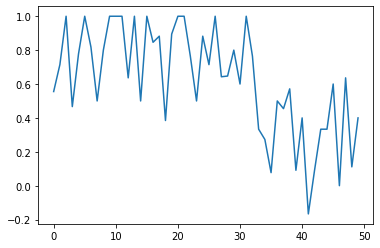

In [725]:
plt.plot(tones)
plt.show()

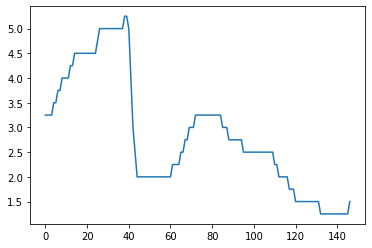

In [728]:
plt.plot(baserate)
plt.show()

In [734]:
# 상관계수
merged['금리'].corr(pd.DataFrame(tones)[0])

0.23019033829433216